In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
inputs  = df.drop(["PassengerId","Pclass","Name","SibSp","Parch","Embarked","Cabin","Ticket"] , axis=1)
inputs.head()

,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500


In [4]:
le = LabelEncoder()
inputs.Sex = le.fit_transform(inputs.Sex)
inputs.head()

,Survived,Sex,Age,Fare
0,0,1,22.0,7.2500
1,1,0,38.0,71.2833
2,1,0,26.0,7.9250
3,1,0,35.0,53.1000
4,0,1,35.0,8.0500


In [5]:
inputs = inputs.drop(["Survived"] , axis=1)
inputs.head()

,Sex,Age,Fare
0,1,22.0,7.2500
1,0,38.0,71.2833
2,0,26.0,7.9250
3,0,35.0,53.1000
4,1,35.0,8.0500


In [6]:
target = df.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs

,Sex,Age,Fare
0,1,22.000000,7.2500
1,0,38.000000,71.2833
2,0,26.000000,7.9250
3,0,35.000000,53.1000
4,1,35.000000,8.0500
...,...,...,...
886,1,27.000000,13.0000
887,0,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [9]:
x_train , x_test , y_train , y_test = train_test_split(inputs , target , test_size=0.35)
model.fit(x_train , y_train)
model.score(x_test , y_test)

0.7884615384615384

In [10]:
lr = LogisticRegression()
lr.fit(x_train , y_train)
lr.score(x_test , y_test)

0.7948717948717948

In [11]:
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test , y_test)

0.6602564102564102

In [12]:
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(x_train , y_train)
rf.score(x_test , y_test)

0.7852564102564102

In [13]:
len(target)

891

In [14]:
count = 0
for i in df["Survived"]:
    if df.Survived[i] == 1:
        count+=1
    else:
        continue

Survival_count = count
Survival_count

342

In [15]:
count = 0
for i in df["Survived"]:
    if df.Survived[i] == 0:
        count+=1
    else:
        continue

Dead_count = count
Dead_count

549

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

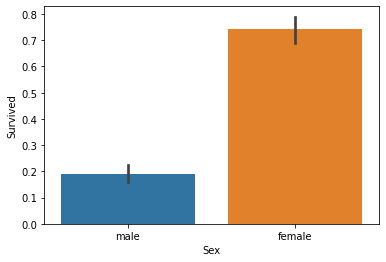

In [16]:
sns.barplot(x="Sex", y="Survived" , data=df)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [19]:
df.Age = df.Age.fillna(df.Age.mean())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


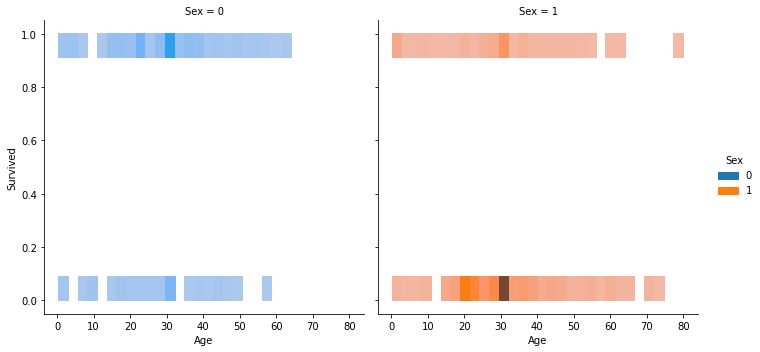

In [20]:
sns.displot(data=df , x="Age" , y="Survived" , kind='hist' ,hue="Sex" , col="Sex")

In [23]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=ha=0.1)
mnb.fit(x_train , y_train)
mnb.score(x_test , y_test)

0.6826923076923077

In [24]:
for i in np.arange(0 ,1 , 0.1):
    mnb =MultinomialNB(alpha=i)
    mnb.fit(x_train , y_train)
    print(mnb.score(x_test , y_test) , i)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


0.6826923076923077 0.0
0.6826923076923077 0.1
0.6826923076923077 0.2
0.6826923076923077 0.30000000000000004
0.6826923076923077 0.4
0.6826923076923077 0.5
0.6826923076923077 0.6000000000000001
0.6826923076923077 0.7000000000000001
0.6826923076923077 0.8
0.6826923076923077 0.9


In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train , y_train)
model.score(x_test , y_test)

0.7884615384615384

In [34]:
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

gs_NB.best_params_

NameError: name 'cv_method' is not defined